## ALUMNO: JOSE  DE JESUS HERRERA LEDON
## PERCEPCION COMPUTACIONAL
## GRUPO 9


### Anomalia: Sal y pimienta (generado)
#### Se utilzaran dos imagenes a color a las que se les generara artificailmente una anomalia aleatoria de puntos negros y blancos, despues se utilizata una tecnica de HIstograma para recuperar en medida de lo posigle la imagen original. 

####  Este proyecot incluye un archivo requiremets.txt  y un README relacionados con las dependencias y la ejecucion del documento

In [1]:
# python librearies
from random import randrange, choice
# External libraries
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray, array, copy, mean, isnan

RGB


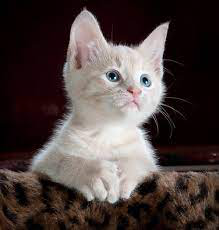

In [2]:
image_easy_colors = Image.open('gato_blanco.jpeg', mode='r', formats=['jpeg'])
image_easy_array = asarray(image_easy_colors)
image_grey_cat =  Image.open('gato_gris.jpeg')
image_grey_cat_array = asarray(image_grey_cat)
print(image_easy_colors.mode)
image_easy_colors

RGB


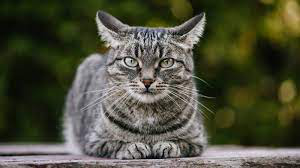

In [3]:
print(image_grey_cat.mode)
image_grey_cat

### Antes de agregar el ruidoa  a la imagen es necesario mapear la imagen en un vector representativo a la imagen


#### Las imagenes estan seleccionadas en formato jpeg RGB, el trabajo con png y la libreria de Pillow para retornar las imagenes no funciono correctamente

#### El formato RGB mapea cada pizel en un grupo de 3 valores, Rojo, Verde y Azu de 0 a 255 en cada uno de ellos.

#### Un pixel negro se representa como [0, 0, 0] y un pixel blanco con [255, 255, 255], conforme al modelo RGB (sistema de color aditivo)

### Veamos que pasa si cambiamos la mitad de la imagen a pixeles negros


## Creando la anomalia sal y pimienta

In [4]:
def random_tuple(range_top_x, range_top_y):
    _x = randrange(range_top_x)
    _y = randrange(range_top_y)
    return (_x, _y)

def add_sald_and_pepper(image_array, percentage_of_anomaly:int =10):
    black_pixel = array([0,0,0])
    white_pixel = array([255, 255, 255])
    salt_and_paper_arr = [black_pixel, white_pixel]
    cols = len(image_array)
    rows = len(image_array[0])
    num_anomalous_pixels = int((cols * rows) * (percentage_of_anomaly/100))
    possition_of_anomalies = [random_tuple(cols, rows) for i in range(num_anomalous_pixels)]
    _image_array = copy(image_array)
    for position in possition_of_anomalies:
        _image_array[position[0], position[1]] = choice(salt_and_paper_arr)
    return _image_array
anomalous_image = add_sald_and_pepper(image_grey_cat_array)

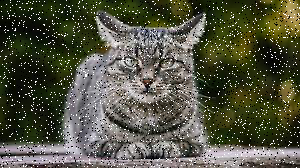

In [5]:
_ = Image.fromarray(anomalous_image)
_

### Ahora se extraen todos los vecinos de cada pixel

In [6]:
def pos_eval(possition, border_row, border_col):
    is_valid = True
    if possition[0] < 0 or possition[1] < 0:
        is_valid = False
        return is_valid
    if possition[0] >= border_col or possition[1] >= border_row:
        is_valid = False
    return is_valid

def mean_from_points(points:list, index:int):
    values  = [value[index] for value in points]
    return mean(values)

#fix by average of pixels arroud  right, left, top, button, right-top, right-buton, left-right, left-button
def pixel_points_for_mean(image_array, row, col, border_row, border_col):
    pixel = image_array[row, col]
    pixels_to_average = []
    # Movements
    row_down = row -1
    row_up = row + 1
    col_left = col - 1
    col_right = col + 1
    # possitions to evaluate
    right_pos = (row, col_right)
    left_pos = (row, col_left)
    top_pos = (row_up, col)
    button_pos = (row_down, col)
    right_top_pos = (row_up, col_right)
    right_button_pos = (row_down, col_right)
    left_top_pos = (row_up, col_left)
    left_button_pos = (row_down, col_left)
    possitions = [
        right_pos,
        left_pos,
        top_pos,
        button_pos,
        right_top_pos,
        right_button_pos,
        left_top_pos,
        left_button_pos
    ]
    valid_possitions = []
    for possition in possitions:
        if pos_eval(possition, border_row, border_col):
            valid_possitions.append(possition)
    return valid_possitions
    

In [7]:
def image_neighbours(image_array):
    neighbords = {}
    border_row = len(image_array)
    border_col = len(image_array[0])
    for row in range(border_row):
        for col in range(border_col):
            neighbords.update({(row,col): pixel_points_for_mean(image_array, row, col, border_row, border_col)})
    return neighbords
neighbords = image_neighbours(anomalous_image)
neighbords

{(0, 0): [(0, 1), (1, 0), (1, 1)],
 (0, 1): [(0, 2), (0, 0), (1, 1), (1, 2), (1, 0)],
 (0, 2): [(0, 3), (0, 1), (1, 2), (1, 3), (1, 1)],
 (0, 3): [(0, 4), (0, 2), (1, 3), (1, 4), (1, 2)],
 (0, 4): [(0, 5), (0, 3), (1, 4), (1, 5), (1, 3)],
 (0, 5): [(0, 6), (0, 4), (1, 5), (1, 6), (1, 4)],
 (0, 6): [(0, 7), (0, 5), (1, 6), (1, 7), (1, 5)],
 (0, 7): [(0, 8), (0, 6), (1, 7), (1, 8), (1, 6)],
 (0, 8): [(0, 9), (0, 7), (1, 8), (1, 9), (1, 7)],
 (0, 9): [(0, 10), (0, 8), (1, 9), (1, 10), (1, 8)],
 (0, 10): [(0, 11), (0, 9), (1, 10), (1, 11), (1, 9)],
 (0, 11): [(0, 12), (0, 10), (1, 11), (1, 12), (1, 10)],
 (0, 12): [(0, 13), (0, 11), (1, 12), (1, 13), (1, 11)],
 (0, 13): [(0, 14), (0, 12), (1, 13), (1, 14), (1, 12)],
 (0, 14): [(0, 15), (0, 13), (1, 14), (1, 15), (1, 13)],
 (0, 15): [(0, 16), (0, 14), (1, 15), (1, 16), (1, 14)],
 (0, 16): [(0, 17), (0, 15), (1, 16), (1, 17), (1, 15)],
 (0, 17): [(0, 18), (0, 16), (1, 17), (1, 18), (1, 16)],
 (0, 18): [(0, 19), (0, 17), (1, 18), (1, 19), (1,

### Ahora que los vecinos estan definidos para cada pixel se va a evaluar el el mean de cada valor de r, g y b en cada posicion

In [8]:
def get_pixels_by_neighbords(neighbords, anomalous_image):
    neighbords_pixels_dict = {}
    for possition in neighbords.keys():
        list_of_neighbords = neighbords[possition]
        neighbords_pixels = []
        for neighbord_possition in list_of_neighbords:
            pixel=anomalous_image[neighbord_possition[1], neighbord_possition[0]]
            neighbords_pixels.append(pixel)
        neighbords_pixels_dict.update({possition: neighbords_pixels})
    return neighbords_pixels_dict


def get_mean_for_neighbords(pixels_by_neighbords:dict, anomalous_image):
    average_values = {}
    rgb_mean = {
        'r': 0,
        'g': 0,
        'b': 0
    }
    for possition in pixels_by_neighbords.keys():
        pixel_neighbords = neighbords[possition]
        this_rgb_mean = rgb_mean.copy()
        this_rgb_mean['r'] = mean_from_points(pixels_by_neighbords[possition], 0)
        this_rgb_mean['g'] = mean_from_points(pixels_by_neighbords[possition], 1)
        this_rgb_mean['b'] = mean_from_points(pixels_by_neighbords[possition], 2)
        if (
            not isnan(this_rgb_mean['r']) or 
            not isnan(this_rgb_mean['g']) or 
            not isnan(this_rgb_mean['b'])
        ):
            average_values.update({possition: this_rgb_mean})
    return average_values


In [9]:
pixels_by_neighbords = get_pixels_by_neighbords(neighbords, anomalous_image)
pixels_by_neighbords

{(0, 0): [array([ 9, 20,  3], dtype=uint8),
  array([ 9, 20,  4], dtype=uint8),
  array([ 9, 20,  3], dtype=uint8)],
 (0, 1): [array([10, 21,  4], dtype=uint8),
  array([0, 0, 0], dtype=uint8),
  array([ 9, 20,  3], dtype=uint8),
  array([10, 21,  4], dtype=uint8),
  array([ 9, 20,  4], dtype=uint8)],
 (0, 2): [array([11, 23,  3], dtype=uint8),
  array([ 9, 20,  3], dtype=uint8),
  array([10, 21,  4], dtype=uint8),
  array([12, 24,  4], dtype=uint8),
  array([ 9, 20,  3], dtype=uint8)],
 (0, 3): [array([13, 25,  1], dtype=uint8),
  array([10, 21,  4], dtype=uint8),
  array([12, 24,  4], dtype=uint8),
  array([13, 25,  1], dtype=uint8),
  array([10, 21,  4], dtype=uint8)],
 (0, 4): [array([14, 27,  1], dtype=uint8),
  array([11, 23,  3], dtype=uint8),
  array([13, 25,  1], dtype=uint8),
  array([15, 28,  2], dtype=uint8),
  array([12, 24,  4], dtype=uint8)],
 (0, 5): [array([16, 29,  3], dtype=uint8),
  array([13, 25,  1], dtype=uint8),
  array([15, 28,  2], dtype=uint8),
  array([255, 

In [10]:
pixel_neighbords_mean = get_mean_for_neighbords(pixels_by_neighbords, anomalous_image)

/home/jesus/Documentos/Maestria/Persepcion/proyecto_anomalias/ENV_ANOMAL/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jesus/Documentos/Maestria/Persepcion/proyecto_anomalias/ENV_ANOMAL/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
pixel_neighbords_mean

{(0, 0): {'r': 9.0, 'g': 20.0, 'b': 3.3333333333333335},
 (0, 1): {'r': 7.6, 'g': 16.4, 'b': 3.0},
 (0, 2): {'r': 10.2, 'g': 21.6, 'b': 3.4},
 (0, 3): {'r': 11.6, 'g': 23.2, 'b': 2.8},
 (0, 4): {'r': 13.0, 'g': 25.4, 'b': 2.2},
 (0, 5): {'r': 62.4, 'g': 72.4, 'b': 52.4},
 (0, 6): {'r': 63.4, 'g': 73.8, 'b': 52.2},
 (0, 7): {'r': 65.2, 'g': 75.6, 'b': 53.6},
 (0, 8): {'r': 14.0, 'g': 24.4, 'b': 2.4},
 (0, 9): {'r': 18.0, 'g': 31.0, 'b': 4.2},
 (0, 10): {'r': 61.0, 'g': 68.6, 'b': 53.4},
 (0, 11): {'r': 60.6, 'g': 68.2, 'b': 53.8},
 (0, 12): {'r': 61.8, 'g': 71.0, 'b': 55.4},
 (0, 13): {'r': 9.8, 'g': 18.8, 'b': 4.6},
 (0, 14): {'r': 11.4, 'g': 22.4, 'b': 5.8},
 (0, 15): {'r': 12.6, 'g': 20.4, 'b': 6.0},
 (0, 16): {'r': 12.8, 'g': 19.0, 'b': 6.0},
 (0, 17): {'r': 14.0, 'g': 17.0, 'b': 6.0},
 (0, 18): {'r': 13.0, 'g': 16.0, 'b': 5.0},
 (0, 19): {'r': 11.6, 'g': 14.6, 'b': 4.4},
 (0, 20): {'r': 10.0, 'g': 13.0, 'b': 3.2},
 (0, 21): {'r': 8.4, 'g': 11.4, 'b': 2.4},
 (0, 22): {'r': 7.4, 'g':

## Ahora tenemos el mean de cada pixel basado en sus vecinos, pero no todos los pixeles necesitan cambiar necesariamente, solo si el color actual y el del mean son demaciado diferentes, para eso habra que encontrarlos, una aproximacion podria ser calcular la distancia vectorial entre los colores, es tal vez muy costoso computacionalmente. 

### El criterio de distancia se puede modificar


In [ ]:
def pixel_distance_replacer(anomalous_image, pixel_neighbords_mean, distance_max):
    for pixel_poss in pixel_neighbords_mean.keys():
        pass